_Graded with 7/7 (100%)_

# Exercise 1

How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.

In [3]:
# Fetch the genome.
!curl -O http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 49270  100 49270    0     0  53213      0 --:--:-- --:--:-- --:--:-- 77346


In [15]:
# Define a function to read the genome.
def readGenome(filename):
    sequences = ''
    with open(filename, 'r') as fh:
        for line in fh:
            if not line[0] == '>': # First line is irrelevant.
                sequences += line.rstrip()
    return sequences

genome = readGenome('lambda_virus.fa')
print(genome[:50] + '...') # Test if genome was processed OK.

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAA...


In [10]:
# Define reverse complement of a genome.
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [11]:
# Define Naive.
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [23]:
# Match patterns.
pattern = 'AGGT'
matches = naive(pattern, genome)
reverseMatches = naive(reverseComplement(pattern), genome)
print('%d matches, %d reverse-complemented matches = %d total matches' 
      % (len(matches), len(reverseMatches), len(matches) + len(reverseMatches)))

150 matches, 156 reverse-complemented matches = 306 total matches


# Exercise 2

How many times does TTAA or its reverse complement occur in the lambda virus genome?
Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [73]:
# Match patterns.
pattern = 'TTAA'
matches = naive(pattern, genome)
print('%d matches for %s' % (len(matches), pattern))

195 matches for TTAA


# Exercise 3

What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [74]:
# Match patterns.
pattern = 'ACTAAGT'
matches = naive(pattern, genome)
matches.extend(naive(reverseComplement(pattern), genome))
print('Leftmost ocurrence is found at offset %d' % (min(matches)))

Leftmost ocurrence is found at offset 26028


# Exercise 4

What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

In [28]:
# Match patterns.
pattern = 'AGTCGA'
matches = naive(pattern, genome)
matches.extend(naive(reverseComplement(pattern), genome))
print('Leftmost ocurrence is found at offset %d' % (min(matches)))

Leftmost ocurrence is found at offset 450


# Exercise 5

As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. We're looking for approximate matches for P itself, not its reverse complement.

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT') should return the list [0, 4].

Hint: See this [notebook](http://nbviewer.ipython.org/github/BenLangmead/ads1-hw-examples/blob/master/hw1_naive_2mm.ipynb) for a few examples you can use to test your naive_2mm function.

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?

In [66]:
# Define Naive with 2 mismatches.
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        mismatchCount = 0
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                mismatchCount += 1
                # print('Mismatch: %s vs. %s, at t[%d + %d] vs. p[%d] (count: %d)'
                #      % (t[i + j], p[j], i, j, j, mismatchCount))
                if mismatchCount > 2:
                    match = False
                    break
        if match:
            # print('Match! at %d' % i)
            occurrences.append(i)
    return occurrences

In [31]:
# Test with Phi-X genome.
!curl -O http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5528  100  5528    0     0   9155      0 --:--:-- --:--:-- --:--:-- 13820


In [67]:
# Read Phi-X and test according to reference notebook if naive_2mm is well defined.
phix_genome = readGenome('phix.fa')
test_occurrences = naive_2mm('GATTACA', phix_genome)
print('Leftmost occurrence is at offset %d' % min(test_occurrences))

Leftmost occurrence is at offset 10


In [69]:
# Worked!
# Test against static sample.
print(naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT'))

[0, 4]


In [70]:
# Also worked! Now for Lambda.
pattern = 'TTCAAGCC'
matches = naive_2mm(pattern, genome)
print('Pattern with up to 2 mismatches found %d times on Lambda.' % len(matches))

Pattern with up to 2 mismatches found 191 times on Lambda.


# Exercise 6

What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [71]:
# Match patterns with up to 2 mismatches.
pattern = 'AGGAGGTT'
matches = naive_2mm(pattern, genome)
print('Pattern with up to 2 mismatches leftmost offset on Lambda is %d.' % min(matches))

Pattern with up to 2 mismatches leftmost offset on Lambda is 49.


# Exercise 7

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question. The reads are taken from this study:

> Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [72]:
# Download the FASTQ DNA sequencing file.
!curl -O https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  6  235k    6 16384    0     0   8670      0  0:00:27  0:00:01  0:00:26 11872
100  235k  100  235k    0     0  96802      0  0:00:02  0:00:02 --:--:--  118k


In [78]:
# Define a FASTQ parser.
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename, 'r') as fh:
        while True:
            fh.readline() # Ignore identifier.
            seq = fh.readline().rstrip() # Read sequences.
            fh.readline() # Ignore placeholder.
            qua = fh.readline().rstrip() # Read qualities.
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qua)
    return sequences, qualities

In [81]:
# Test the parser.
human_sequences, human_qualities = readFastq('ERR037900_1.first1000.fastq')
print(human_sequences[:2])
print(human_qualities[:2])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC']
['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############']


In [82]:
# Define a Phred33 decoder.
def phred33decode(s):
    return ord(s) - 33

In [83]:
# Test the decoder
phred33decode(human_qualities[0][0])

39

In [84]:
# Define a function to help us find G's and C's.
def findGC(sequences):
    read_len = len(sequences[0])
    gc = [0] * read_len
    totals = [0] * read_len
    
    for seq in sequences:
        for i in range(len(seq)):
            base = seq[i]
            if base == 'G' or base == 'C':
                gc[i] += 1
            totals[i] += 1
            
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
            
    return gc

In [86]:
# Set Matplotlib environment. If fails, do `conda install matplotlib`
%matplotlib inline
import matplotlib.pyplot as plt

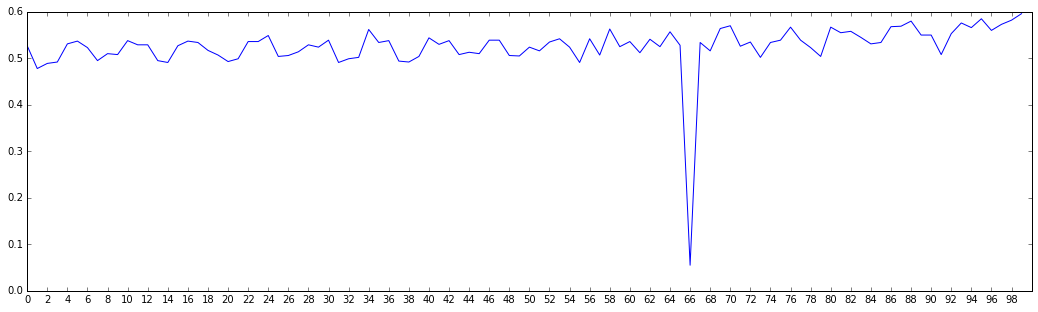

In [99]:
# Get the GCs for the human sequences and plot it.
import numpy as np
human_gc = findGC(human_sequences)
fig = plt.figure(figsize=(18, 5))
plt.plot(range(len(human_gc)), human_gc)
plt.xticks(np.arange(0, 100, 2.0))
plt.show()

In [100]:
# We can see a problem arises around offset 66.